# 자연어처리 시작하기
* soynlp(https://github.com/lovit/soynlp)로 토큰화하고 명사를 추출해 워드클라우드 그려보기

In [ ]:
!pip install soynlp

    100% |████████████████████████████████| 1.8MB 14.8MB/s 


In [ ]:
!pip show soynlp

Name: soynlp
Version: 0.0.49
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, psutil
Required-by: 


In [ ]:
import pandas as pd
import numpy as np
import re

# 데이터 로드하기
*  데이터 출처 : https://github.com/akngs/petitions

In [ ]:
import os
import platform

base_path = "data"
file_name = "petition.csv"
url ='https://drive.google.com/open?id=1d8VEAj6n83wT1YRlCrhoU_1mMSvYpXc4'

def file_exist_check(base_path, file_name):
    if os.path.exists(f"./{file_name}"):
        print(f"{os.getcwd()}/{base_path} 경로에 파일이 있음")
        return

    if not os.path.exists(base_path):
        os.makedirs(base_path)

    if platform.system() == "Linux":
        # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증하기
        !pip install -U -q PyDrive
        from pydrive.auth import GoogleAuth
        from pydrive.drive import GoogleDrive
        from google.colab import auth
        from oauth2client.client import GoogleCredentials
        
        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        drive = GoogleDrive(gauth)

        id = url.split('=')[1]
        downloaded = drive.CreateFile({'id':id}) 
        downloaded.GetContentFile(f'{base_path}/{file_name}')  
        print(f"사용자의 구글 드라이브에 {base_path}/{file_name} 다운로드 완료")
    else:
        print(f"{url} 에서 다운로드 받아 실습 경로 {os.getcwd()}/{base_path}에 옮겨주세요.""")
        return
    
file_exist_check(base_path, file_name) 

In [ ]:
df = pd.read_csv(f"{base_path}/petition.csv", index_col="article_id",
                        parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 본다.
df.shape

(377756, 7)

In [ ]:
df.shape

(377756, 7)

In [ ]:
df.tail()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...
492043,2019-01-09,2019-02-08,0,1,행정,예천군과 환경부를 규탄합니다. 어불성설인 가축사육 관련 법규를 개정해주세요!,해당 사건이 발생한 곳은 요즘은 매체에서 매일 나오는 곳으로 '군의원의 외유성 해외...


## 자신의 관심사에 맞는 단어로 데이터를 가져옵니다.

In [ ]:
p = r'.*(돌봄|육아|초등|보육).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(14960, 7)

In [ ]:
care.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...
49,2017-08-19,2017-11-17,0,27,일자리,공정한사회 절차가 바른사회가 되기를 원합니다.,문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...
56,2017-08-19,2017-11-17,0,5,보건복지,장애아의 상태에 따른 장애아돌봄도우미 정책의 한계에 관하여...읽어주셨으면 하고 글...,"안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입..."


In [ ]:
care.tail(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
491776,2019-01-09,2019-02-08,0,3,일자리,장애인 일자리를 지켜주세요,제주에 사는 김응순입니다. 큰 딸 아이가 지적장애인 2급입니다. 요즘 나라에서 일자...
491889,2019-01-09,2019-02-08,0,2,기타,회사발령을 반대합니다,8살 남자아이를 키우고있는 엄마입니다\n몇일전 저희 신랑이 갑자기 부산에서 서울로 ...
491966,2019-01-09,2019-02-08,0,0,육아/교육,문재인대통령님...고 김영옥 대령 교과서에 실어주세요~,미국전쟁영웅이자 한국에서도 마찬가지로 영웅인분을 교과서에 실어서 기리면 좋겠습니다\...


In [ ]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 24

In [ ]:
sample_title = care.loc[sample_index, 'title']
sample_title

'공공기관 무조건적인 정규직전환을 반대합니다.'

In [ ]:
sample_content = care['content'][sample_index]
sample_content

'현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인맥으로 들어온 경우가 많습니다. 자질이 안되는데도 정규직이 된다면 그 피해는 국민들에게 돌아갈것입니다. 현재 공공기관 정규직들은 100대1의 경쟁률을 뚫고 들어온 경우도 있습니다. 지금도 노량진에서 수많은 청춘들이 공부를 하고 있죠. 기존 비정규직들을 무조건적으로 무기직 전환한다면 또 다른 정유라 탄생이고 역차별입니다. 새로 필요로 하는 신규채용부터 공채절차를 거쳐 무기직 전환해야합니다. 예전에 공무원 기능직의 일반직 전환, 초등학교에 중초교사 임용 등이 그 예죠. 실제 일하는 곳에서는 그분들로 인한 업무처리 미흡으로 문제가 되고 있습니다. 사립학교는 인건비를 국가에서 주니 사립학교도 국가에서 공채해야 합니다. 부디 사례 하나하나를 보아가며 처리해주시고 전체 정규직 숫자 전환만 보며 공약실천을 무리하게 하지 말아주세요.  국민들은 정의로운 나라를 원합니다. 역차별이 아닌 공정한 채용이 되게 해주세요.'

# 토큰화

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [ ]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['공공기관', '무조건적인', '정규직전환을', '반대합니다', '.']

In [ ]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:20]

['현정부에서',
 '정규직',
 '일자리를',
 '늘리는',
 '것에',
 '찬성합니다',
 '.',
 '그런데',
 '공공기관',
 '비정규직들은',
 '인맥으로',
 '들어온',
 '경우가',
 '많습니다',
 '.',
 '자질이',
 '안되는데도',
 '정규직이',
 '된다면',
 '그']

In [ ]:
print(len(tokened_title))
print(len(tokened_content))

5
125


# 텍스트 데이터 전처리 
* 개행문자 제거

In [ ]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [ ]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = care['content'].apply(preprocessing)

CPU times: user 97.9 ms, sys: 3.08 ms, total: 101 ms
Wall time: 105 ms


In [ ]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 26.9 s, sys: 387 ms, total: 27.3 s
Wall time: 27.3 s


article_id
24    [현정부에서, 정규직, 일자리를, 늘리는, 것에, 찬성합니다, ., 그런데, 공공기...
36    [문재인, 대통령님과, 각, 정부, 인사분들께, 마음속, 깊이, 존경과, 감사를, ...
45    [초등학교, 교사, 임용, 시험을, 수능, 시험, 처럼, 전국, 단위로, 실시하고난...
Name: content, dtype: object

In [ ]:
tokens[sample_index][:10]

['현정부에서', '정규직', '일자리를', '늘리는', '것에', '찬성합니다', '.', '그런데', '공공기관', '비정규직들은']

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
!pip install wordcloud

In [ ]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무'] 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

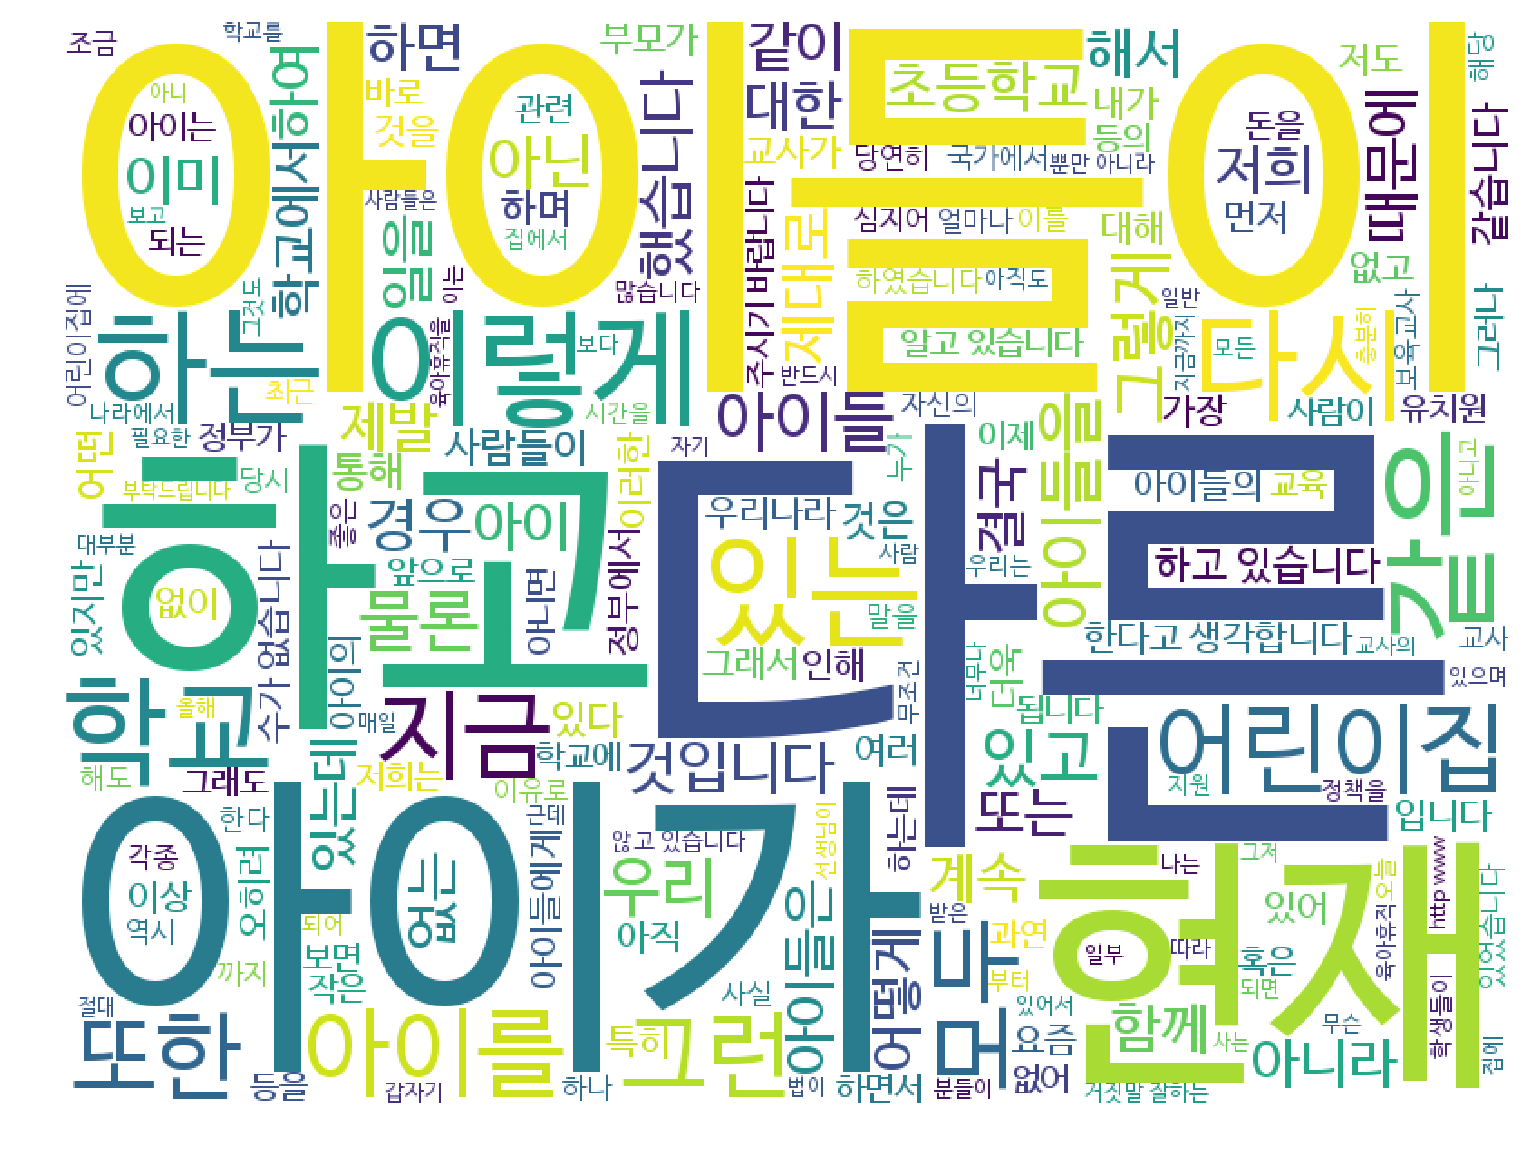

CPU times: user 36.2 s, sys: 2.17 s, total: 38.4 s
Wall time: 38.3 s


In [ ]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [ ]:
from soynlp.noun import LRNounExtractor

In [ ]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (171586, 86055) tokens
building lr-graph completedCPU times: user 50.5 s, sys: 209 ms, total: 50.7 s
Wall time: 50.7 s


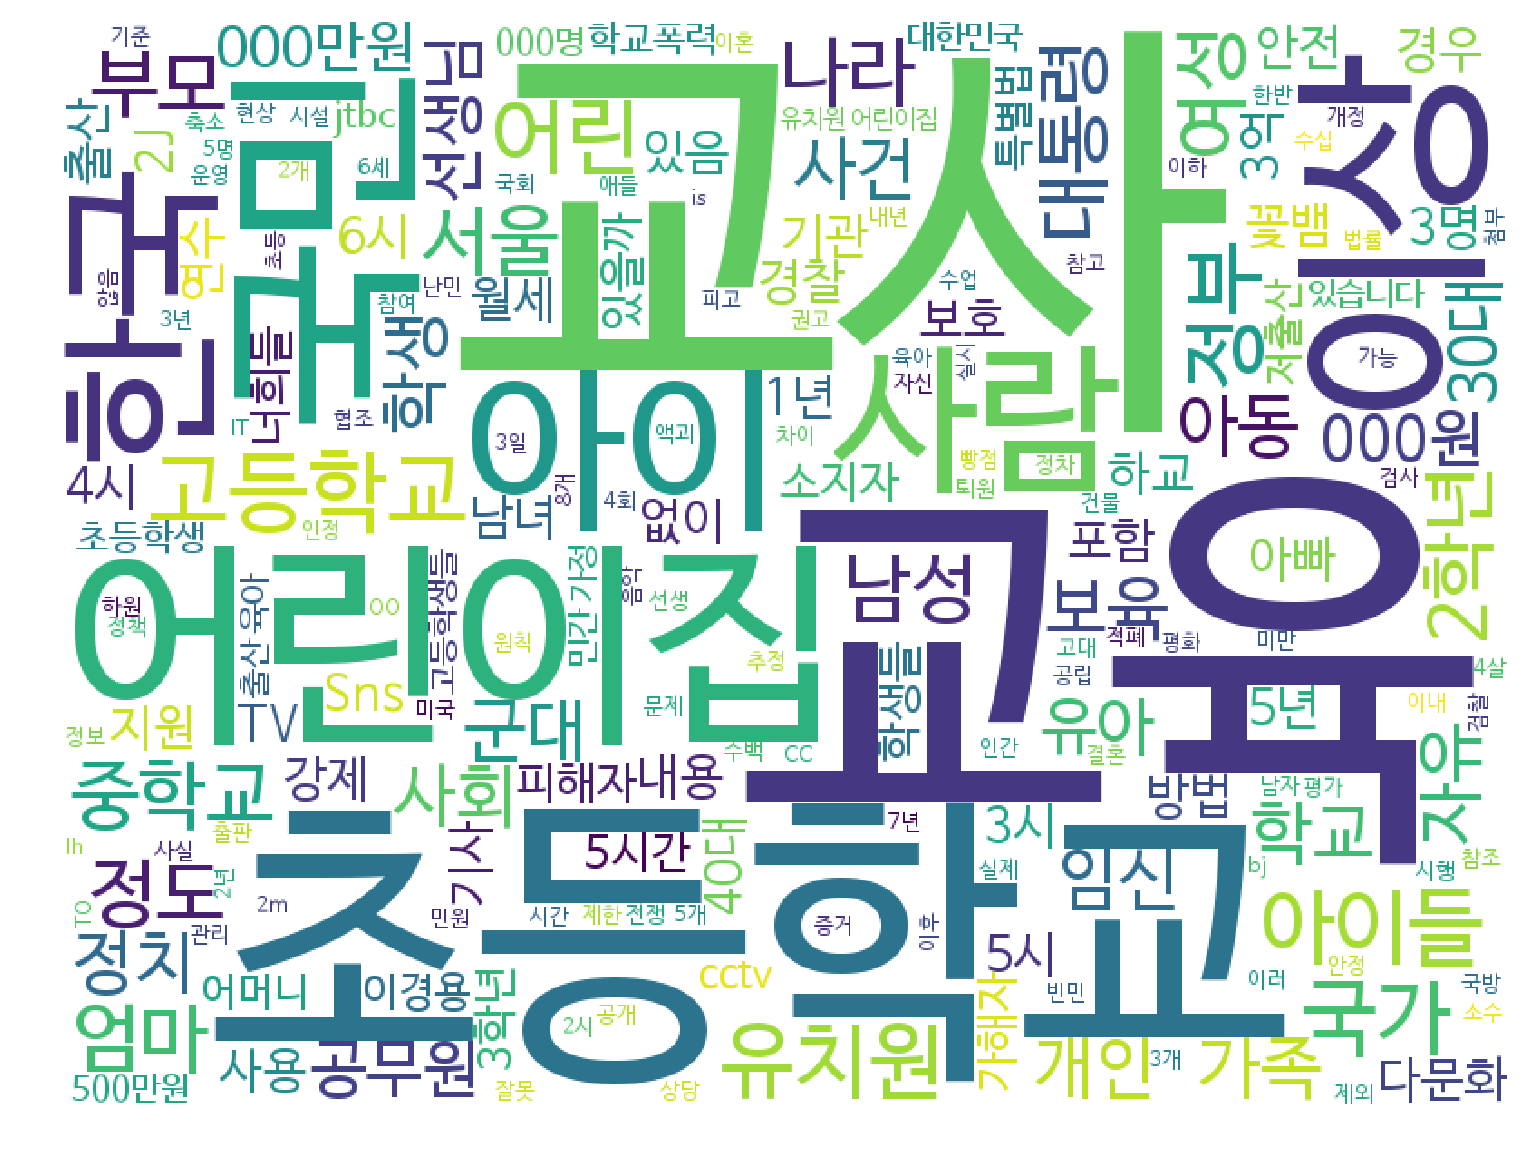

CPU times: user 2.4 s, sys: 158 ms, total: 2.56 s
Wall time: 2.45 s


In [ ]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))